In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 0.74  # Shear effect parameter from the fit
sigma = 9.8 * 1e-3  # Surface tension in J/m² (dyne/cm to J/m²)
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in K
a = 530e-9  # Droplet radius in meters
xi = 0.14  # Coupling parameter from the fit
phi_c = 0.625  # Critical volume fraction
V_drop = (4/3) * np.pi * a**3  # Droplet volume in m^3

In [3]:
phi_T_squared = (3 * k_B * T / a**3) / (2 * np.pi * xi * sigma / a)  # Equation 6

# Equation 5
def phid_star(phi, phi_c, phi_T_squared):
    term1 = phi - phi_c
    term2 = np.sqrt(term1**2 + phi_T_squared)
    return 0.5 * (term1 + term2)

# Equation 10
def Gp_prime(phi, phi_c, alpha, xi, sigma, a):
    # phi_d_star = phid_star(phi, phi_c, phi_T_squared)
    return 6 * alpha * xi * sigma / a * phi * ((phi - phi_c) + np.sqrt((phi - phi_c)**2 + phi_T_squared))

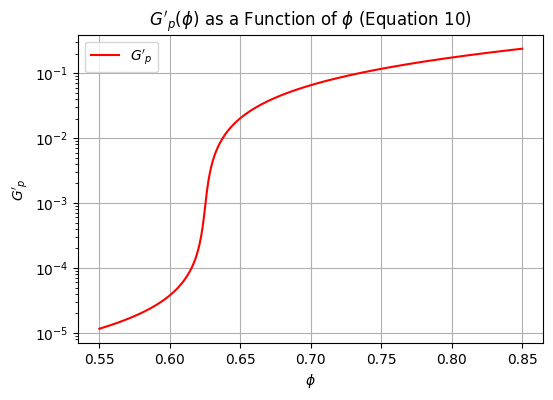

In [4]:
phi_values = np.linspace(0.55, 0.85, 300)

Gp_prime_values = Gp_prime(phi_values, phi_c, alpha, xi, sigma, a)  / (sigma / a)

plt.figure(figsize=(6, 4))
plt.plot(phi_values, Gp_prime_values, label=r"$G'_p$", color='red')
plt.yscale('log')  
plt.title(r"$G'_p(\phi)$ as a Function of $\phi$ (Equation 10)")
plt.xlabel(r'$\phi$')
plt.ylabel(r"$G'_p$")
plt.grid(True)
plt.legend()
plt.show()


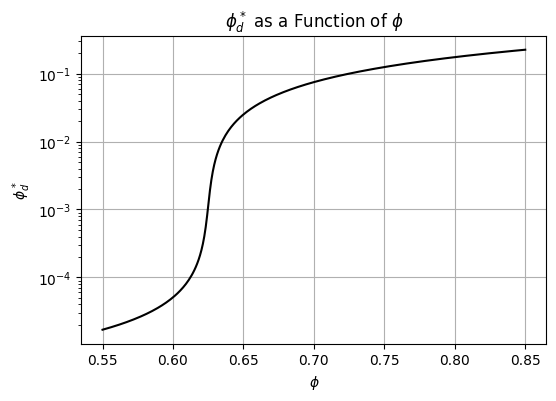

In [5]:
phid_star_values_log = phid_star(phi_values, phi_c, phi_T_squared)

plt.figure(figsize=(6, 4))
plt.plot(phi_values, phid_star_values_log, color='black')
plt.yscale('log') 
plt.title(r'$\phi_d^*$ as a Function of $\phi$')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\phi_d^*$')
plt.grid(True)
plt.show()

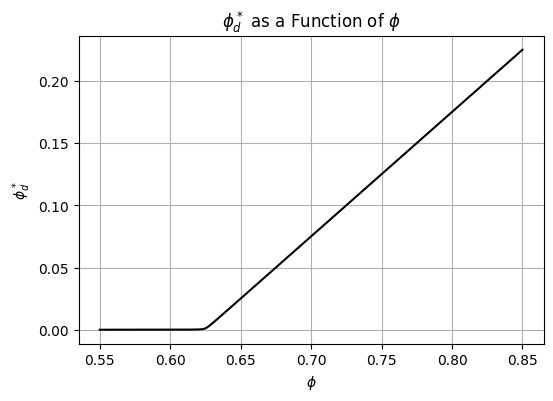

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(phi_values, phid_star_values_log, color='black')
# plt.yscale('log') 
plt.title(r'$\phi_d^*$ as a Function of $\phi$')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\phi_d^*$')
plt.grid(True)
plt.show()

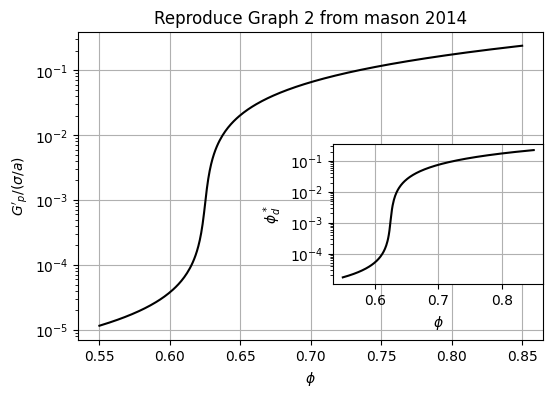

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

plt.title('Reproduce Graph 2 from mason 2014')
ax.plot(phi_values, Gp_prime_values, label=r"$G'_p/(\sigma/a)$", color='black')
ax.set_yscale('log') 
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r"$G'_p / (\sigma/a)$")
ax.grid(True)

inset_ax = fig.add_axes([0.55, 0.25, 0.35, 0.35])
inset_ax.plot(phi_values, phid_star_values_log, color='black')
inset_ax.set_yscale('log')
inset_ax.set_xlabel(r'$\phi$', fontsize=10)
inset_ax.set_ylabel(r'$\phi_d^*$', fontsize=10)
inset_ax.grid(True)

plt.show()

In [8]:
# Equation 8
def Pi_phi(phi, phi_c, xi):
    term1 = phi - phi_c
    return 3 * xi * phi**2 * (term1 + np.sqrt(term1**2 + phi_T_squared))

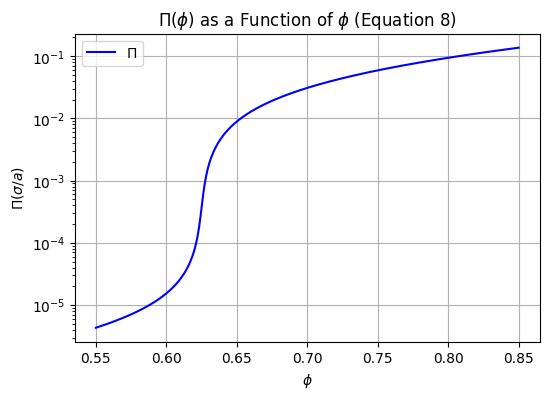

In [9]:
Pi_phi_values = Pi_phi(phi_values, phi_c, xi) 

plt.figure(figsize=(6, 4))
plt.plot(phi_values, Pi_phi_values, label=r"$\Pi$", color='blue')
plt.yscale('log')  
plt.title(r'$\Pi(\phi)$ as a Function of $\phi$ (Equation 8)')
plt.xlabel(r'$\phi$')
plt.ylabel(r"$\Pi(\sigma/a)$")
plt.grid(True)
plt.legend()
plt.show()

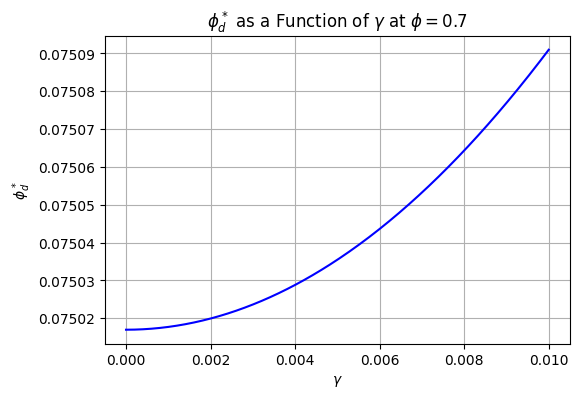

In [10]:
phi_fixed = 0.7

gamma_values = np.linspace(0, 0.01, 300)

def phid_star_gamma(phi, phi_c, phi_T_squared, gamma):
    term1 = phi - phi_c + alpha * gamma**2
    term2 = np.sqrt(term1**2 + phi_T_squared)
    return 0.5 * (term1 + term2)

phid_star_values_gamma = [phid_star_gamma(phi_fixed, phi_c, phi_T_squared, gamma) for gamma in gamma_values]

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(gamma_values, phid_star_values_gamma, color='blue')
plt.title(r'$\phi_d^*$ as a Function of $\gamma$ at $\phi = 0.7$')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\phi_d^*$')
plt.grid(True)
plt.show()

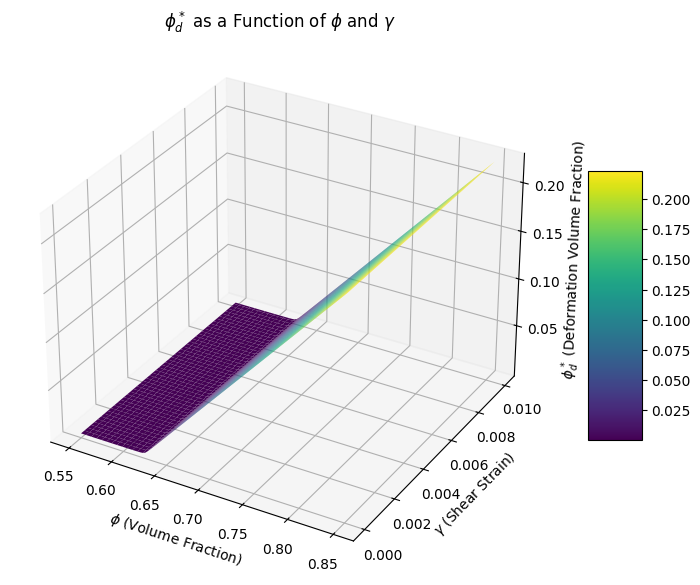

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given parameters
alpha = 0.74  # Shear effect parameter from the fit
sigma = 9.8e-3  # Surface tension in J/m² (dyne/cm to J/m²)
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 298  # Temperature in K
a = 530e-9  # Droplet radius in meters
xi = 0.14  # Coupling parameter from the fit
phi_c = 0.625  # Critical volume fraction

# Derived parameters
phi_T_squared = (3 * k_B * T / a**3) / (2 * np.pi * xi * (sigma / a))
phi_T = np.sqrt(phi_T_squared)

# Range of phi and gamma
phi_values = np.linspace(0.55, 0.85, 100)
gamma_values = np.linspace(0, 0.01, 100)
phi, gamma = np.meshgrid(phi_values, gamma_values)

# Calculate phi_d* based on the given formula
phi_d_star = 0.5 * ((phi - (phi_c - alpha * gamma**2)) + 
                    np.sqrt((phi - (phi_c - alpha * gamma**2))**2 + phi_T**2))

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Creating the surface plot
surf = ax.plot_surface(phi, gamma, phi_d_star, cmap='viridis', edgecolor='none')

# Setting labels and title
ax.set_xlabel('$\phi$ (Volume Fraction)')
ax.set_ylabel(r'$\gamma$ (Shear Strain)')
ax.set_zlabel(r'$\phi_d^*$ (Deformation Volume Fraction)')
ax.set_title(r'$\phi_d^*$ as a Function of $\phi$ and $\gamma$')

# Adding color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


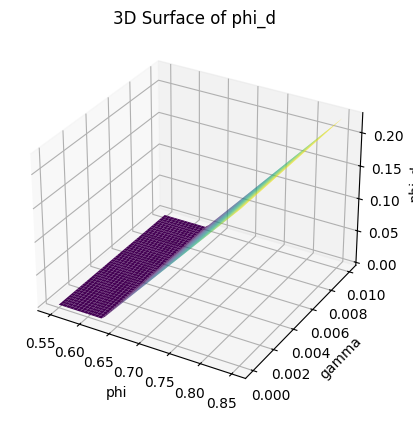

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.74
sigma = 9.8e-3
k_B = 1.38e-23
T = 298
a = 530e-9
xi = 0.14
phi_c = 0.625

# Target function
def target_eqn(phi_d, phi, gamma):
    return 4 * np.pi * a**2 * sigma * xi * phi_d**2 - 3 * k_B * T * np.log(phi_c + phi_d + phi - alpha * gamma**2)

# Function to find the minimum phi_d
def find_min_phi_d(phi, gamma):
    boundary_condition = phi_c - phi - alpha * gamma**2

    if boundary_condition > 0:
        lower_bound = 0
    else:
        lower_bound = phi + alpha * gamma**2 - phi_c

    min_phi_d = lower_bound
    min_value = target_eqn(min_phi_d, phi, gamma)

    # Iterate over a range of phi_d to find the minimum value
    for phi_d in np.linspace(lower_bound, 0.35, 100):
        current_value = target_eqn(phi_d, phi, gamma)
        if current_value < min_value:
            min_value = current_value
            min_phi_d = phi_d
    
    return min_phi_d, min_value

# phi and gamma values range
phi_values = np.linspace(0.55, 0.85, 50)
gamma_values = np.linspace(0, 0.01, 50)

# Create a matrix to store the results
phi_d_values = np.zeros((len(phi_values), len(gamma_values)))

# Iterate over phi and gamma values to calculate the minimum phi_d
for i in range(len(phi_values)):
    for j in range(len(gamma_values)):
        phi = phi_values[i]
        gamma = gamma_values[j]
        phi_d, _ = find_min_phi_d(phi, gamma)
        phi_d_values[i, j] = phi_d

# Create a grid for phi and gamma
phi_grid, gamma_grid = np.meshgrid(phi_values, gamma_values)

# Plot 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(phi_grid, gamma_grid, phi_d_values.T, cmap='viridis')

ax.set_xlabel('phi')
ax.set_ylabel('gamma')
ax.set_zlabel('phi_d')
ax.set_title('3D Surface of phi_d')

plt.show()
